<a href="https://colab.research.google.com/github/stevenvoo/fastai_courses/blob/master/basic_imagenette_imagewoof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Exercise (Imagenette & Imagewoof)

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import accuracy

A quick introduction on the "Imagenette" dataset. This dataset consists of a subset of 10 easily classified classes from Imagenet: tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute. The more detailed information on this dataset can be found here: https://github.com/fastai/imagenette

In [2]:
#download the datasets from fastai library

path = untar_data(URLs.IMAGENETTE)
path

PosixPath('/root/.fastai/data/imagenette')

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette/val'),
 PosixPath('/root/.fastai/data/imagenette/train')]

In [0]:
path_train = path/'train'
path_test = path/'val'

In [5]:
path_train.ls()
#fn_train = get_image_files(path_train)
#fn_train[:5]

[PosixPath('/root/.fastai/data/imagenette/train/n02979186'),
 PosixPath('/root/.fastai/data/imagenette/train/n02102040'),
 PosixPath('/root/.fastai/data/imagenette/train/n03888257'),
 PosixPath('/root/.fastai/data/imagenette/train/n03028079'),
 PosixPath('/root/.fastai/data/imagenette/train/n03445777'),
 PosixPath('/root/.fastai/data/imagenette/train/n01440764'),
 PosixPath('/root/.fastai/data/imagenette/train/n03417042'),
 PosixPath('/root/.fastai/data/imagenette/train/n03394916'),
 PosixPath('/root/.fastai/data/imagenette/train/n03000684'),
 PosixPath('/root/.fastai/data/imagenette/train/n03425413')]

In [7]:
# not JPG, PNG or other image file extensions, images are stored in each of those folders and the folders' names are actually the labels

tfms = get_transforms(max_rotate = 25)

data = ImageList.from_folder(path).split_by_folder(valid='val').label_from_folder().transform(tfms, size=224).databunch(bs=64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (12894 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02979186,n02979186,n02979186,n02979186,n02979186
Path: /root/.fastai/data/imagenette;

Valid: LabelList (500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02979186,n02979186,n02979186,n02979186,n02979186
Path: /root/.fastai/data/imagenette;

Test: None

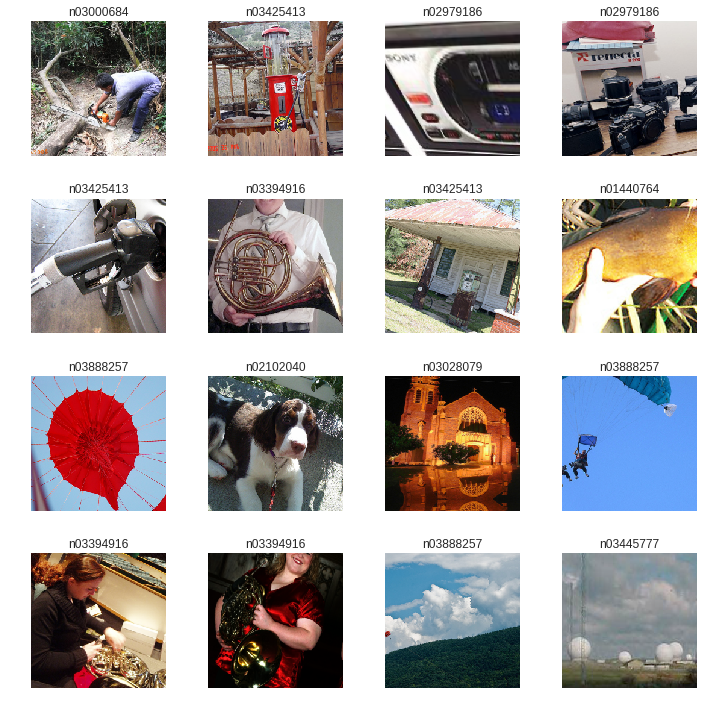

In [8]:
data.show_batch(rows=4, figsize=(10,10))

In [9]:
# to confirm there are only 10 classes of images

print(data.classes)
data.c

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


10

## Model Training

Pre-trained ResNet34 will be used as the fitting model. We expect the model is enough to classify this simple dataset.

In [10]:
# deploy ResNet34

learn = cnn_learner(data, models.resnet34, metrics = accuracy)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 22016383.74it/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.163213,0.029113,0.992000,03:49
1,0.090840,0.018032,0.994000,03:38
2,0.069157,0.032422,0.990000,03:36
3,0.051214,0.028922,0.990000,03:34
4,0.048976,0.025196,0.990000,03:31


The pre-trained model can classify with very high accuracy on simple image dataset.

In [0]:
# save the model

learn.save("baseline_nette")

## Results

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not.

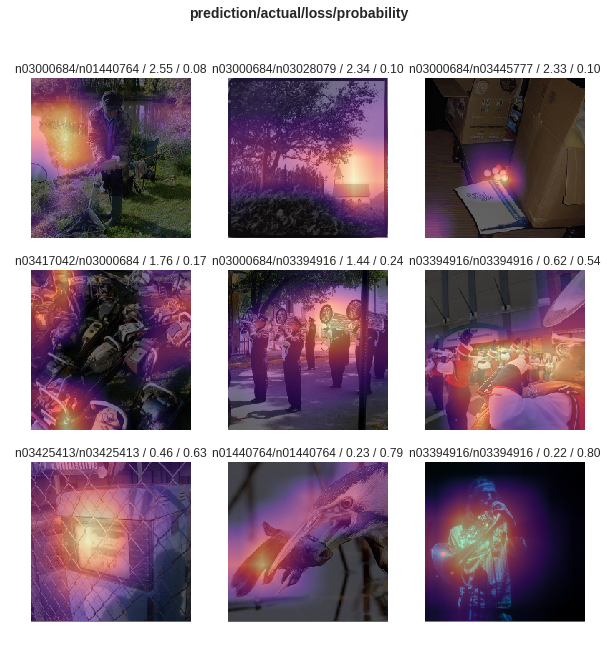

In [13]:
result = ClassificationInterpretation.from_learner(learn)
result.plot_top_losses(9, figsize=(10,10))

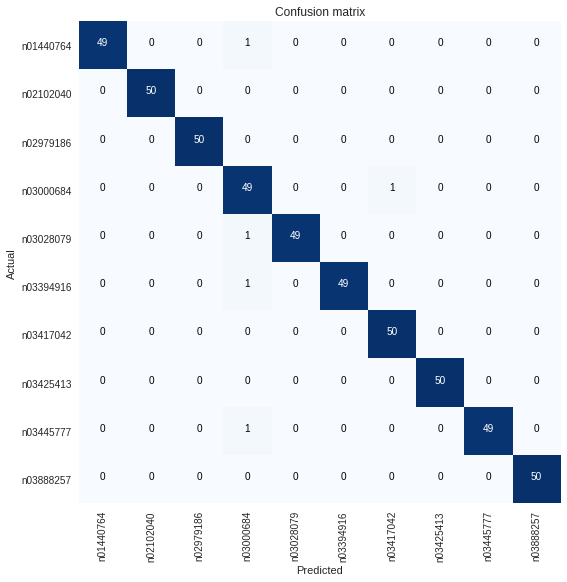

In [14]:
result.plot_confusion_matrix(figsize=(8,8))

From the confusion matrix, it is clear that the model is doing very well as it predicts almost all of the 500 objects correctly (out-of-sample).

# Imagewoof Dataset

We will now do the harder classification using Imagewoof dataset. This data contains a subset of 10 harder to classify classes from Imagenet (all dog breeds): Australian terrier, Border terrier, Samoyed, beagle, Shih-Tzu, English foxhound, Rhodesian ridgeback, dingo, golden retriever, Old English sheepdog. 

In [15]:
path2 = untar_data(URLs.IMAGEWOOF)
path2

PosixPath('/root/.fastai/data/imagewoof')

In [16]:
path2.ls()

[PosixPath('/root/.fastai/data/imagewoof/val'),
 PosixPath('/root/.fastai/data/imagewoof/train')]

In [17]:
data2 = ImageList.from_folder(path2).split_by_folder(valid="val").label_from_folder().transform(tfms, size=224).databunch(bs=64).normalize(imagenet_stats)
data2

ImageDataBunch;

Train: LabelList (12454 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02105641,n02105641,n02105641,n02105641,n02105641
Path: /root/.fastai/data/imagewoof;

Valid: LabelList (500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02105641,n02105641,n02105641,n02105641,n02105641
Path: /root/.fastai/data/imagewoof;

Test: None

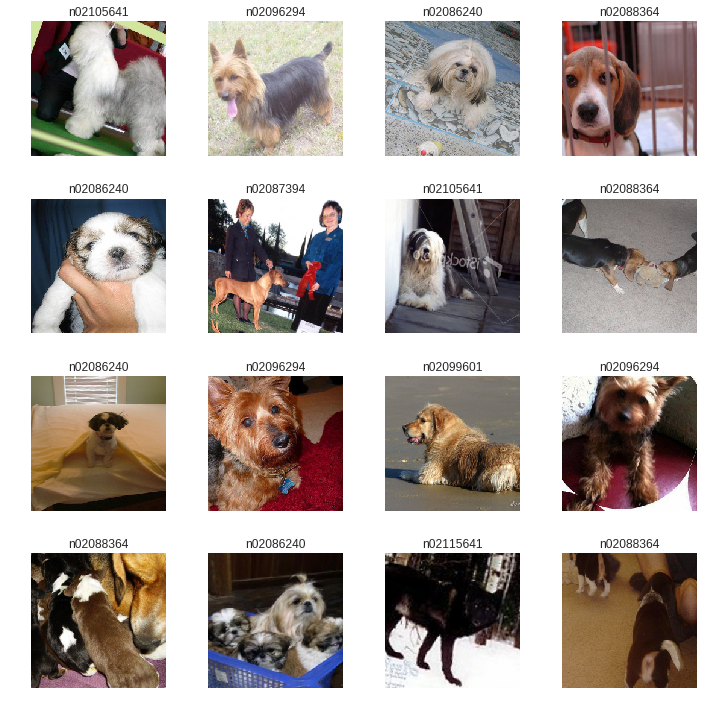

In [18]:
data2.show_batch(rows=4, figsize=(10,10))

In [19]:
print(data2.classes)
data2.c

['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']


10

## Training (Imagewoof)

Using ResNet34 as baseline model. Then we will fit other model and tune parameters if needed.

In [20]:
# ResNet34 model as baseline

learn2 = cnn_learner(data2, models.resnet34, metrics = accuracy)
learn2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [21]:
learn2.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.370099,0.266348,0.906000,03:49
1,0.255688,0.226145,0.926000,03:50
2,0.199312,0.223915,0.918000,03:50
3,0.179048,0.207807,0.912000,03:51
4,0.147425,0.209166,0.912000,03:50


ResNet34 of 5 cycle epochs gives an accuracy of 91%, which is very good.

In [0]:
learn2.save("baseline_woof")

## Result (Imagewoof)

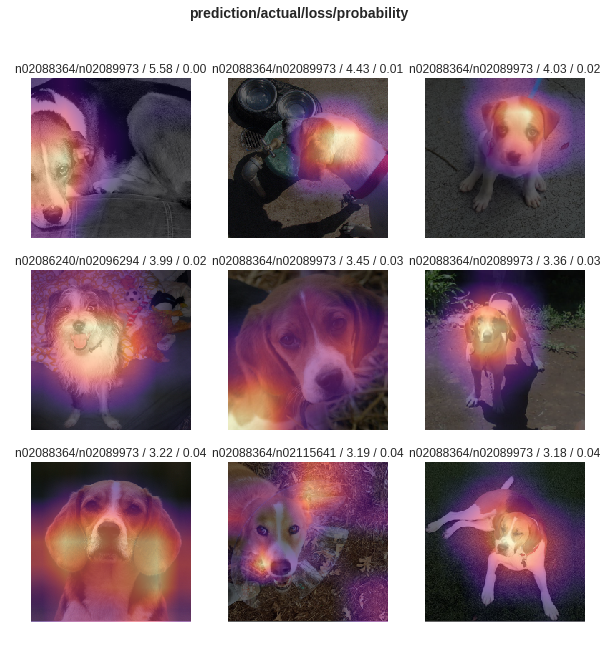

In [23]:
result2 = ClassificationInterpretation.from_learner(learn2)
result2.plot_top_losses(9, figsize=(10,10))

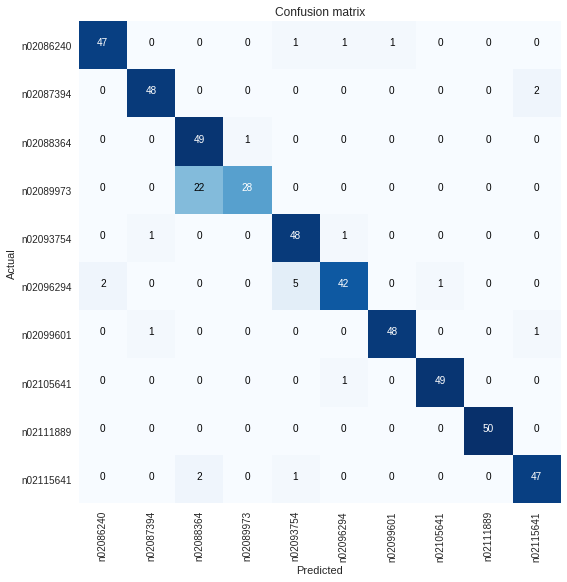

In [24]:
result2.plot_confusion_matrix(figsize=(8,8))

We can see clearly that n02089973 is being confused with n02088364 a lot.

## Result of using ResNet50 for Imagewoof

ResNet50 model will be used to train and see if the accuracy can be raised up.

In [25]:
learn3 = cnn_learner(data2, models.resnet50, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 80146074.76it/s]


In [26]:
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.260093,0.244253,0.924000,04:41
1,0.203483,0.261730,0.910000,04:32
2,0.154421,0.188457,0.940000,04:32
3,0.133705,0.188665,0.936000,04:31
4,0.101821,0.185720,0.938000,04:33


In [0]:
# save this model

learn3.save("res50_woof")

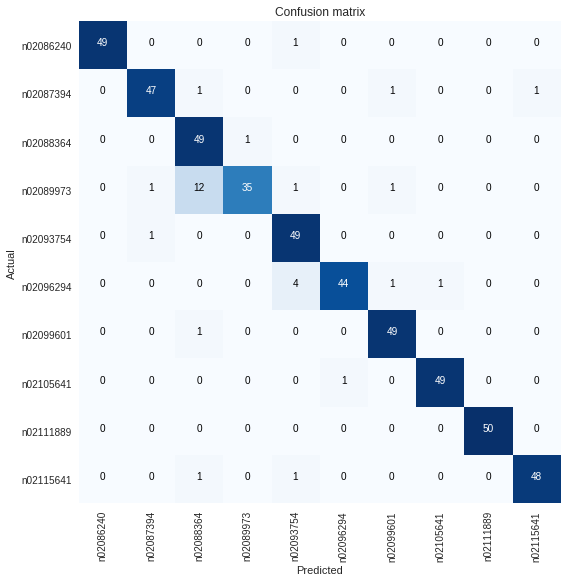

In [28]:
result3 = ClassificationInterpretation.from_learner(learn3)
result3.plot_confusion_matrix(figsize=(8,8))

The classification is improved from that of ResNet34. n02089973 and n02088364 get confused less but still significant.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


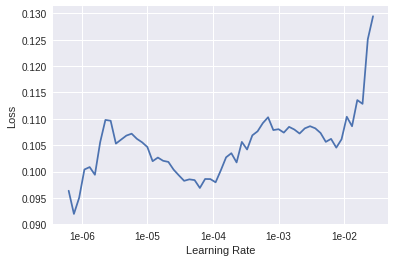

In [29]:
learn3.lr_find()
learn3.recorder.plot()

In [0]:
# tune the learning rate to see if the model improved.

#learn3.unfreeze()
#learn3.fit_one_cycle(5, max_lr = slice(1e-6,1e-2))